# **Importing and Merging Data**

In [109]:
import warnings
warnings.filterwarnings('ignore')


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [113]:
internet_data = pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


# **Combining all the files in the one dataset**

In [114]:
df_1 = pd.merge(churn_data,customer_data, how='inner',on='customerID')

In [115]:
telcom = pd.merge(df_1,internet_data,how='inner',on='customerID')

In [116]:
telcom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [117]:
telcom.shape

(7043, 21)

In [118]:
telcom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [119]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


# **Data Preparation**

In [120]:
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def binary_map(x):
  return x.map({'Yes':1,'No':0})

telcom[varlist]=telcom[varlist].apply(binary_map)

In [121]:
telcom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


for categorical variable with multiple level, create dummy feature.

In [122]:
dummy1 = pd.get_dummies(telcom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

In [123]:
telcom = pd.concat([telcom, dummy1], axis=1)

In [124]:
telcom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [125]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   Contract                               7043 non-null   object 
 4   PaperlessBilling                       7043 non-null   int64  
 5   PaymentMethod                          7043 non-null   object 
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   gender                                 7043 non-null   object 
 10  SeniorCitizen                          7043 non-null   int64  
 11  Part

In [126]:
telcom['OnlineBackup'].astype('category').value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [127]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telcom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
#Adding the results to the master dataframe
telcom = pd.concat([telcom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telcom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
# Adding the results to the master dataframe
telcom = pd.concat([telcom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telcom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
# Adding the results to the master dataframe
telcom = pd.concat([telcom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'.
dp = pd.get_dummies(telcom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
# Adding the results to the master dataframe
telcom = pd.concat([telcom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'.
ts = pd.get_dummies(telcom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
# Adding the results to the master dataframe
telcom = pd.concat([telcom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telcom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis=1)
# Adding the results to the master dataframe
telcom = pd.concat([telcom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'.
sm = pd.get_dummies(telcom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis=1)
# Adding the results to the master dataframe
telcom = pd.concat([telcom,sm1], axis=1)

In [128]:
telcom = telcom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [129]:
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'],errors='coerce')

In [130]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

In [131]:
bool_columns = telcom.select_dtypes(include='bool').columns.tolist()

In [132]:
telcom[bool_columns] = telcom[bool_columns].astype(int)

In [133]:
telcom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


Checking outliers

In [134]:
num_telecom = telcom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [135]:
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

Null check

In [136]:
telcom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [137]:
round(100*(telcom.isnull().sum()/len(telcom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [138]:
telcom = telcom[~np.isnan(telcom['TotalCharges'])]

In [139]:
round(100*(telcom.isnull().sum()/len(telcom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Removing Duplicates

In [140]:
telcom = telcom.drop_duplicates()

In [141]:
telcom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


# **Test-Train Split**

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X = telcom.drop(['Churn','customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [144]:
y = telcom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=100)

# **Feature Selection**

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

In [148]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [149]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


churn_rate

In [150]:
churn = (sum(telcom['Churn'])/len(telcom['Churn'].index))*100
churn

26.578498293515356

# **Looking at Correlations**

In [151]:
%matplotlib inline

In [152]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   int64  
 11  Contract_

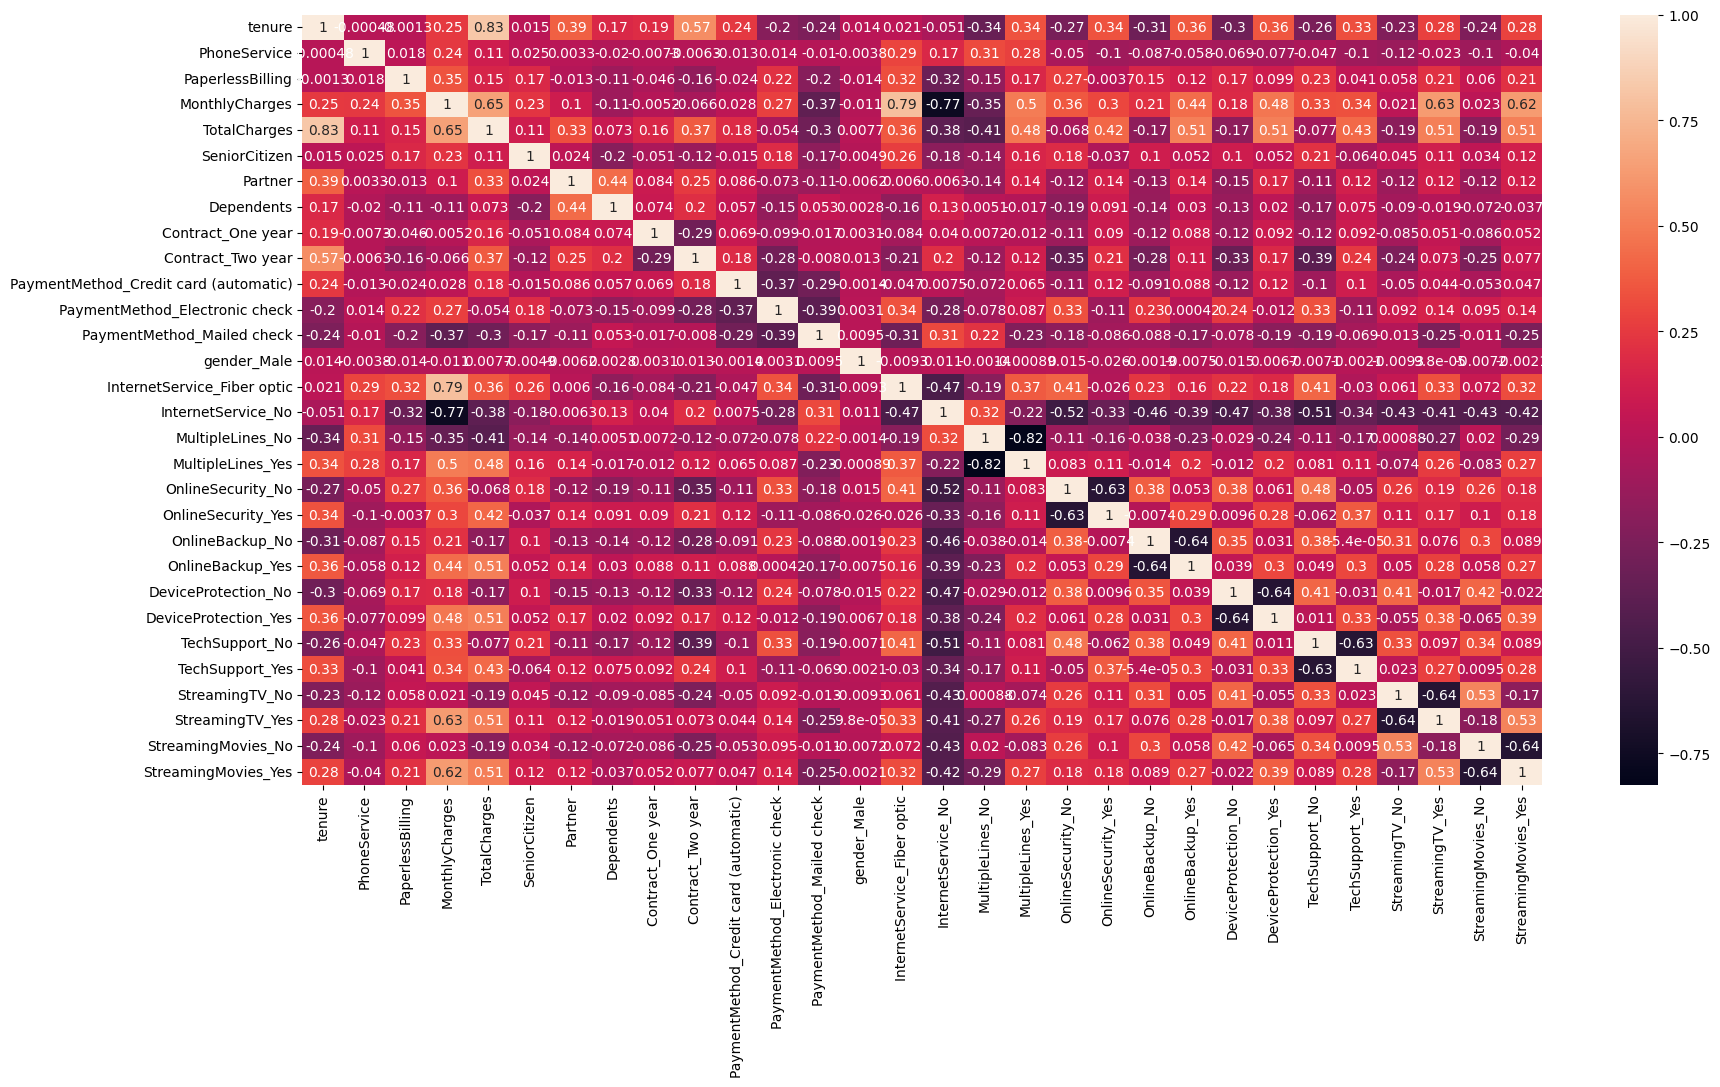

In [153]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [154]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis=1)

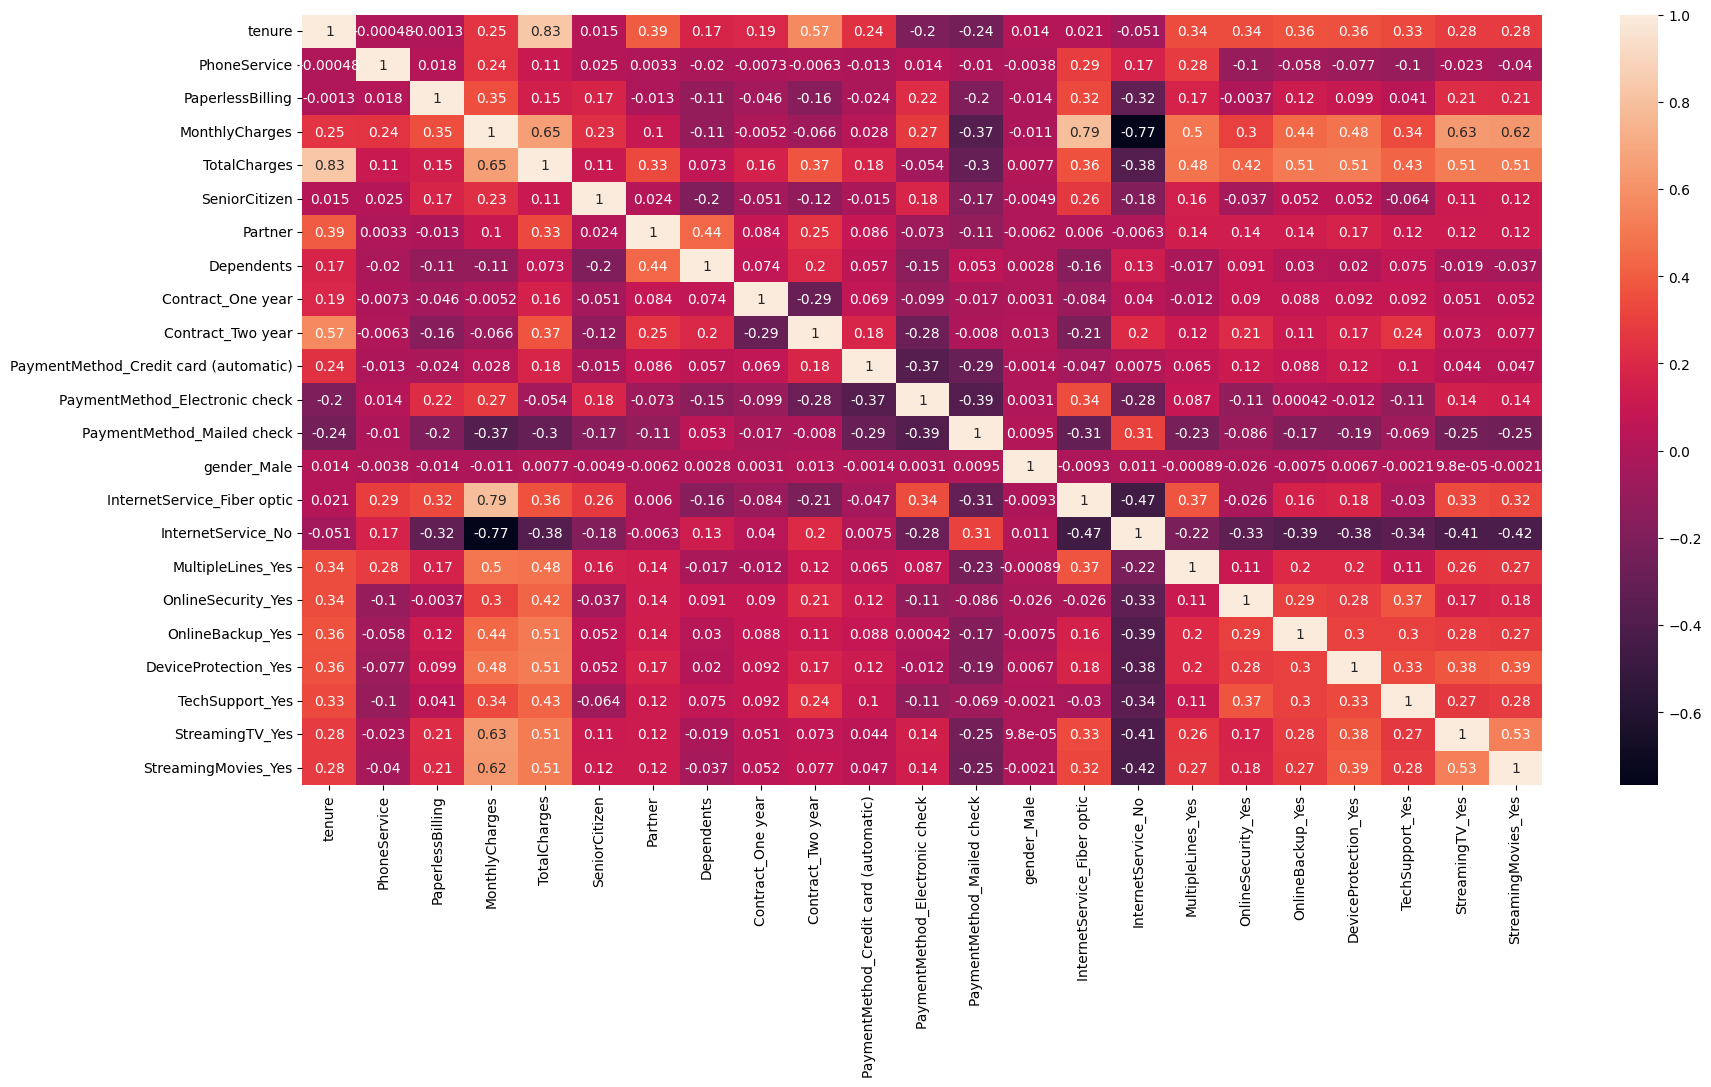

In [155]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# **Model Building**

Running Your First Training Model

In [156]:
import statsmodels.api as sm

In [157]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 01 Jul 2024   Deviance:                       4009.4
Time:                        21:16:25   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
logreg = LogisticRegression()

In [160]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step= 15)
rfe = rfe.fit(X_train,y_train)

In [161]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False, False])

In [162]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 2),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 2),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 2),
 ('PaymentMethod_Electronic check', False, 2),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 2),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 2),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 2),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 2),
 ('StreamingMovies_Yes', False, 2)]

In [163]:
col = X_train.columns[rfe.support_]

In [164]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

Assessing the model with StatsModels

In [165]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.4
Date:                Mon, 01 Jul 2024   Deviance:                       4058.8
Time:                        21:16:25   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2772
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0413      0.159     -6.549      0.000      -1.353      -0.730
tenure                         -1.6383      0.179     -9.144      0.000      -1.989      -1.287
PhoneService                   -0.5284      0.158     -3.351      0.001      -0.837      -0.219
PaperlessBilling                0.3857      0.089      4.342      0.000       0.212       0.560
TotalCharges                    0.9172      0.178      5.164      0.000       0.569       1.265
SeniorCitizen                   0.4661      0.098      4.734      0.000       0.273       0.659
Contract_One year              -0.6951      0.127     -5.489      0.000      -0.943      -0.447
Contract_Two year              -1.3206      0.211     -6.267      0.000      -1.734      -0.908
InternetService_Fiber optic     0.8495      0.115      7.372      0.000       0.624       1.075
InternetService_No             -1.0987      0.163     -6.754      0.000      -1.417      -0.780
OnlineSecurity_Yes             -0.4463      0.101     -4.411      0.000      -0.645      -0.248
TechSupport_Yes                -0.4113      0.101     -4.078      0.000      -0.609      -0.214
===============================================================================================
"""

In [166]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.186973
5790    0.221098
6498    0.706631
880     0.452262
2784    0.597300
3874    0.407458
5387    0.395341
6623    0.792946
4465    0.173628
5364    0.587858
dtype: float64

In [167]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18697313, 0.22109783, 0.70663147, 0.45226158, 0.59730043,
       0.40745791, 0.39534058, 0.79294585, 0.17362802, 0.58785844])

In [168]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.186973,879
1,0,0.221098,5790
2,1,0.706631,6498
3,1,0.452262,880
4,1,0.597300,2784


In [169]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.186973,879,0
1,0,0.221098,5790,0
2,1,0.706631,6498,1
3,1,0.452262,880,0
4,1,0.597300,2784,1


In [170]:
from sklearn import metrics

In [171]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [172]:
print(confusion)

[[3258  377]
 [ 581  706]]


In [173]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8053636733035352


In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [175]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,7.53
3,TotalCharges,6.70
0,tenure,6.43
7,InternetService_Fiber optic,3.86
6,Contract_Two year,3.14
8,InternetService_No,3.11
2,PaperlessBilling,2.58
10,TechSupport_Yes,2.04
9,OnlineSecurity_Yes,1.87
5,Contract_One year,1.86


In [176]:
col = col.drop('PhoneService',1)

**New Model**

In [177]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.0
Date:                Mon, 01 Jul 2024   Deviance:                       4070.0
Time:                        21:16:26   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2755
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4052      0.118    -11.896      0.000      -1.637      -1.174
tenure                         -1.5230      0.176     -8.664      0.000      -1.868      -1.178
PaperlessBilling                0.3878      0.089      4.376      0.000       0.214       0.561
TotalCharges                    0.8029      0.175      4.599      0.000       0.461       1.145
SeniorCitizen                   0.4804      0.098      4.888      0.000       0.288       0.673
Contract_One year              -0.6954      0.126     -5.498      0.000      -0.943      -0.447
Contract_Two year              -1.3059      0.210     -6.210      0.000      -1.718      -0.894
InternetService_Fiber optic     0.7209      0.107      6.711      0.000       0.510       0.931
InternetService_No             -1.2607      0.154     -8.166      0.000      -1.563      -0.958
OnlineSecurity_Yes             -0.4513      0.101     -4.466      0.000      -0.649      -0.253
TechSupport_Yes                -0.4192      0.101     -4.165      0.000      -0.616      -0.222
===============================================================================================
"""

In [178]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [179]:
y_train_pred[:10]

array([0.21936663, 0.17178828, 0.70687985, 0.44783518, 0.59526661,
       0.44437051, 0.30548355, 0.79554054, 0.13117564, 0.58901727])

In [180]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [181]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.219367,879,0
1,0,0.171788,5790,0
2,1,0.706880,6498,1
3,1,0.447835,880,0
4,1,0.595267,2784,1


In [182]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8041446566436408


In [183]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,6.69
0,tenure,6.26
5,Contract_Two year,2.92
6,InternetService_Fiber optic,2.56
1,PaperlessBilling,2.32
7,InternetService_No,2.22
9,TechSupport_Yes,1.93
8,OnlineSecurity_Yes,1.74
4,Contract_One year,1.73
3,SeniorCitizen,1.29


In [184]:
col = col.drop('TotalCharges',1)

**Model 3:**

In [185]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.3
Date:                Mon, 01 Jul 2024   Deviance:                       4092.6
Time:                        21:16:27   Pearson chi2:                 5.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2722
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4403      0.116    -12.420      0.000      -1.668      -1.213
tenure                         -0.7821      0.060    -13.022      0.000      -0.900      -0.664
PaperlessBilling                0.3884      0.088      4.397      0.000       0.215       0.562
SeniorCitizen                   0.4926      0.099      4.990      0.000       0.299       0.686
Contract_One year              -0.6732      0.125     -5.377      0.000      -0.919      -0.428
Contract_Two year              -1.2475      0.207     -6.023      0.000      -1.653      -0.842
InternetService_Fiber optic     0.9792      0.092     10.677      0.000       0.799       1.159
InternetService_No             -1.3089      0.153     -8.557      0.000      -1.609      -1.009
OnlineSecurity_Yes             -0.4094      0.101     -4.065      0.000      -0.607      -0.212
TechSupport_Yes                -0.3422      0.099     -3.445      0.001      -0.537      -0.148
===============================================================================================
"""

In [186]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [187]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [188]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.255928,879,0
1,0,0.215738,5790,0
2,1,0.717755,6498,1
3,1,0.473632,880,0
4,1,0.621366,2784,1


In [189]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7988622511174319


In [190]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.87
1,PaperlessBilling,2.29
5,InternetService_Fiber optic,2.00
8,TechSupport_Yes,1.88
6,InternetService_No,1.81
0,tenure,1.76
3,Contract_One year,1.73
7,OnlineSecurity_Yes,1.73
2,SeniorCitizen,1.29


In [191]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [192]:
print(confusion)

[[3278  357]
 [ 633  654]]


**Metrics Beyond Simply Accuracy**

In [193]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [194]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5081585081585082

In [195]:
# Let us calculate specificity
TN / float(TN+FP)

0.9017881705639614

In [196]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09821182943603851


In [197]:
# positive predictive value
print (TP / float(TP+FP))

0.6468842729970327


In [198]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8381488110457683


**ROC Curve**

In [199]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

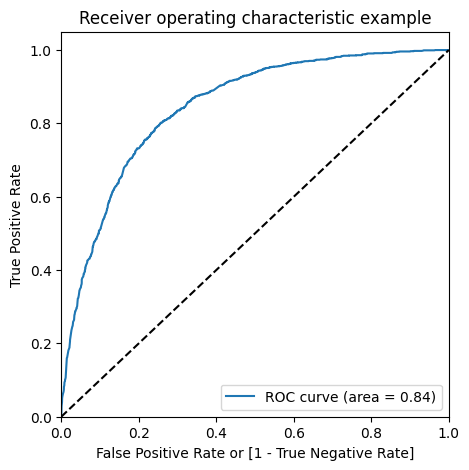

In [200]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

**Finding Optimal Cutpoint**

In [201]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.255928,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.215738,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.717755,6498,1,1,1,1,1,1,1,1,1,0,0
3,1,0.473632,880,0,1,1,1,1,1,0,0,0,0,0
4,1,0.621366,2784,1,1,1,1,1,1,1,1,0,0,0


In [202]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.608696  0.944056  0.489959
0.2   0.2  0.719220  0.859363  0.669601
0.3   0.3  0.766152  0.777778  0.762036
0.4   0.4  0.796424  0.651127  0.847868
0.5   0.5  0.798862  0.508159  0.901788
0.6   0.6  0.797440  0.387723  0.942503
0.7   0.7  0.772653  0.190365  0.978817
0.8   0.8  0.747460  0.039627  0.998074
0.9   0.9  0.738521  0.000000  1.000000


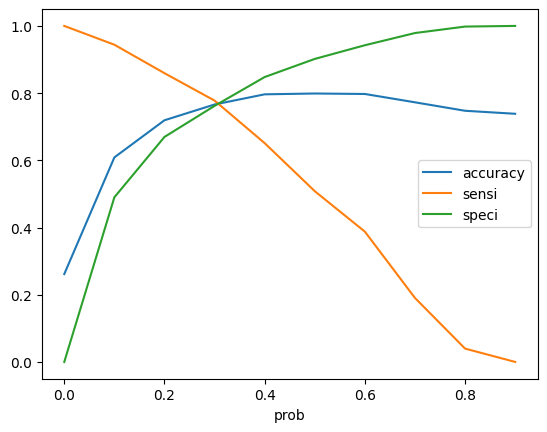

In [203]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**o.3 is cutpoint**

# **Precision and Recall**

In [204]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [205]:
print(confusion)

[[3278  357]
 [ 633  654]]


**precision**

In [206]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6468842729970327

**Recall**

In [207]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5081585081585082

In [208]:
from sklearn.metrics import precision_score, recall_score

In [209]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6468842729970327

In [210]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5081585081585082

**Precision and recall tradeoff**

In [211]:
from sklearn.metrics import precision_recall_curve

In [212]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [213]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

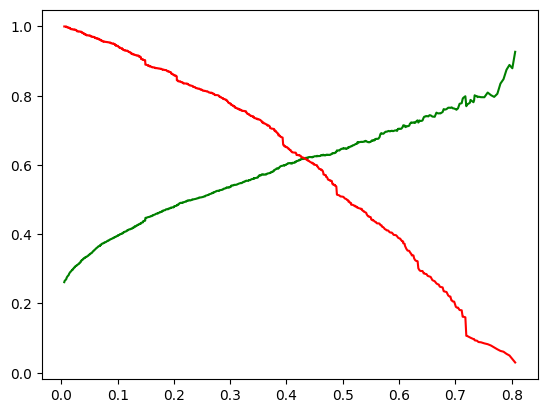

In [214]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# **Making predictions on the test set**

In [215]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [216]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes
942,-0.347623,1,0,0,0,1,0,0,0
3730,0.999203,1,0,0,0,1,0,0,0
1761,1.040015,1,0,0,1,0,1,0,0
2283,-1.286319,1,0,0,0,1,0,0,0
1872,0.346196,0,0,0,1,0,1,0,0


In [217]:
X_test_sm = sm.add_constant(X_test)

In [218]:
y_test_pred = res.predict(X_test_sm)

In [219]:
y_test_pred[:10]

942     0.549635
3730    0.298561
1761    0.011873
2283    0.717755
1872    0.013825
1970    0.677396
2532    0.296030
1616    0.013899
2485    0.626772
5914    0.124341
dtype: float64

In [220]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [221]:
y_pred_1.head()

,0
942,0.549635
3730,0.298561
1761,0.011873
2283,0.717755
1872,0.013825


In [223]:
y_test_df = pd.DataFrame(y_test)

In [224]:
y_test_df['CustID'] = y_test_df.index

In [225]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [226]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [227]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.549635
1,1,3730,0.298561
2,0,1761,0.011873
3,1,2283,0.717755
4,0,1872,0.013825


In [228]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [230]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0. else 0)

In [231]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,942,0.549635,1
1,1,3730,0.298561,0
2,0,1761,0.011873,0
3,1,2283,0.717755,1
4,0,1872,0.013825,0


In [232]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7815165876777251

In [233]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1295,  233],
       [ 228,  354]])

In [234]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [235]:
TP / float(TP+FN)

0.6082474226804123

In [236]:
TN / float(TN+FP)

0.8475130890052356